## **Dataset de Google Maps - Sitios**

Definimos un proceso eficiente para lidiar con la información de 11 archivos de establecimientos. Cargamos la mitad en un DataFrame y luego la otra mitad en otro para un procesamiento más rápido. Luego, unificamos los DataFrames para un análisis completo. Este enfoque optimizado mejora la velocidad y el uso de recursos, lo que nos permite obtener una visión global de los datos.

In [28]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import plotly.express as px
from collections import Counter
import re
from geopy.geocoders import Nominatim
from geopy.distance import great_circle

In [22]:
data_folder = 'Dataset de Google Maps\\metadata.sitios\\metadata.sitios'
file_names_to_read = ['1.json', '2.json', '3.json', '4.json', '5.json', '6.json']
rows = []

for filename in file_names_to_read:
    file_path = os.path.join(data_folder, filename)
    with open(file_path) as f:
        for line in f:
            try:
                data = json.loads(line)
                rows.append(data)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON in {filename}: {e}")

data_sitios1 = pd.DataFrame(rows)

In [23]:
data_folder = 'Dataset de Google Maps\\metadata.sitios\\metadata.sitios'
file_names_to_read = ['7.json', '8.json', '9.json', '10.json', '11.json']
rows = []

for filename in file_names_to_read:
    file_path = os.path.join(data_folder, filename)
    with open(file_path) as f:
        for line in f:
            try:
                data = json.loads(line)
                rows.append(data)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON in {filename}: {e}")

data_sitios2 = pd.DataFrame(rows)

Unificar los df

In [24]:
data_sitios = pd.concat([data_sitios1, data_sitios2], ignore_index=True)

---

In [25]:
data_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025011 entries, 0 to 3025010
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              object 
 1   address           object 
 2   gmap_id           object 
 3   description       object 
 4   latitude          float64
 5   longitude         float64
 6   category          object 
 7   avg_rating        float64
 8   num_of_reviews    int64  
 9   price             object 
 10  hours             object 
 11  MISC              object 
 12  state             object 
 13  relative_results  object 
 14  url               object 
dtypes: float64(3), int64(1), object(11)
memory usage: 346.2+ MB


In [26]:
data_sitios.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


Convertir las listas de la columna "category" en valores únicos separados por comas

In [27]:
data_sitios['category'] = data_sitios['category'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

data_sitios.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,Pharmacy,4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,Textile exporter,4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,Korean restaurant,4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,Fabric store,3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,Fabric store,4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


Realizamos un análisis de duplicados en base a la columna "gmap_id" para tomar decisiones respecto al manejo de los datos. Este proceso nos permite garantizar la integridad y calidad de la información.

In [28]:
duplicates = data_sitios[data_sitios['gmap_id'].duplicated(keep=False)]
duplicates_count = duplicates['gmap_id'].value_counts()

print("Total de duplicados en 'gmap_id':", len(duplicates))

Total de duplicados en 'gmap_id': 53156



Seleccionamos un registro al azar para examinar sus duplicados y evaluar si comparten la misma información en todas las columnas. Este enfoque nos ayuda a identificar duplicados y asegurarnos de que la eliminación de registros no tenga un impacto significativo en la cantidad total de datos en el conjunto.

In [29]:
duplicates.sample()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
7638,Don's Roffler Family Hair,"Don's Roffler Family Hair, 2008 S Church St, B...",0x88532bde8397d307:0x625c243b3af7e009,None,36.082931,-79.465029,Barber shop,4.7,8,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x88532bafd5b33421:0xdd6c40337df83442, 0x8853...",https://www.google.com/maps/place//data=!4m2!3...


In [30]:
filtered_result = data_sitios[data_sitios['name'] == 'London Go Karts']

filtered_result

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
25136,London Go Karts,"London Go Karts, 323 Levi Jackson Mill Rd, Lon...",0x885ccdb4d45f1757:0x848ff530a65c115f,None,37.085907,-84.058622,Go-kart track,5.0,3,None,"[[Tuesday, 9AM–10PM], [Wednesday, 9AM–10PM], [...",{'Amenities': ['Good for kids']},Permanently closed,"[0x88434e1ca4a62b7b:0xf303151389c11883, 0x885c...",https://www.google.com/maps/place//data=!4m2!3...
51709,London Go Karts,"London Go Karts, 323 Levi Jackson Mill Rd, Lon...",0x885ccdb4d45f1757:0x848ff530a65c115f,None,37.085907,-84.058622,Go-kart track,5.0,3,None,"[[Tuesday, 9AM–10PM], [Wednesday, 9AM–10PM], [...",{'Amenities': ['Good for kids']},Permanently closed,"[0x88434e1ca4a62b7b:0xf303151389c11883, 0x885c...",https://www.google.com/maps/place//data=!4m2!3...


Después de confirmar que los duplicados comparten la misma información en todas sus columnas, procedemos a eliminar estos registros.

In [31]:
data_sitios.drop_duplicates(subset='name', inplace=True)

data_sitios.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,Pharmacy,4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,Textile exporter,4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,Korean restaurant,4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,Fabric store,3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,Fabric store,4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


Hemos llevado a cabo un análisis exhaustivo de la columna "MISC" con el propósito de evaluar su potencial contribución al enfoque general del proyecto. Durante esta evaluación, observamos que la columna encapsula información detallada acerca de características, comodidades y aspectos sobresalientes asociados a cada ubicación. No obstante, tras considerar varios factores, hemos tomado la decisión de conservar esta columna en nuestro conjunto de datos.

Esta elección se fundamenta en el reconocimiento de que la información contenida en la columna "MISC" podría potencialmente aportar un valor significativo al modelo de recomendación en la fase final del proyecto. Al conservar esta columna, buscamos enriquecer la capacidad del modelo para brindar recomendaciones más precisas y personalizadas a los usuarios finales.

Nuestra intención no es solo simplificar el conjunto de datos, sino también optimizarlo para nuestros objetivos específicos. Al mantener la columna "MISC" en nuestro conjunto de características, estamos trabajando para lograr un equilibrio entre la relevancia y la eficacia, lo que nos permitirá alcanzar resultados más sólidos y satisfactorios en el desarrollo de nuestro proyecto.

In [53]:
# Convertir el contenido de la columna 'MISC' a diccionarios
data_sitios['MISC'] = data_sitios['MISC'].apply(lambda x: json.loads(x.replace("'", "\"")) if isinstance(x, str) else x)

# Explorar la columna 'MISC' para los primeros 10 registros
for index, row in data_sitios.head(1).iterrows():
    misc_info = row['MISC']
    if misc_info is not None:
        print(f"Fila {index}:")
        for key, value in misc_info.items():
            print(f"  {key}: {value}")
        print("=" * 30)

Fila 0:
  Accessibility: ['Wheelchair accessible entrance']
  Activities: None
  Amenities: ['Good for kids']
  Atmosphere: ['Casual']
  Crowd: None
  Dining options: None
  From the business: None
  Getting here: None
  Health & safety: None
  Health and safety: None
  Highlights: None
  Lodging options: None
  Offerings: ['Comfort food']
  Payments: None
  Planning: None
  Popular for: None
  Recycling: None
  Service options: ['Takeout' 'Dine-in' 'Delivery']


Realizamos un análisis exhaustivo de la cantidad de valores nulos por columna en el conjunto de datos. Evaluamos la relevancia de la información que aportan estas columnas y cómo contribuyen a nuestros objetivos. Con base en esta evaluación, consideramos la posibilidad de reducir la cantidad de datos en el dataset eliminando aquellas columnas con una cantidad significativa de valores nulos que no aportan información crucial para el proyecto. Esta estrategia nos ayuda a concentrarnos en los datos más relevantes y a mejorar la eficiencia del análisis.

In [37]:
null_percentages = (data_sitios.isnull().sum() / len(data_sitios)) * 100

null_info_df = pd.DataFrame({
    
    'Cantidad_Nulos': data_sitios.isnull().sum(),
    'Porcentaje_Nulos': null_percentages.values.round(2)
})

null_info_df

,Cantidad_Nulos,Porcentaje_Nulos
name,1,0.00
address,75478,3.27
gmap_id,0,0.00
description,2230159,96.63
latitude,0,0.00
longitude,0,0.00
category,15828,0.69
avg_rating,0,0.00
num_of_reviews,0,0.00
price,2222011,96.27


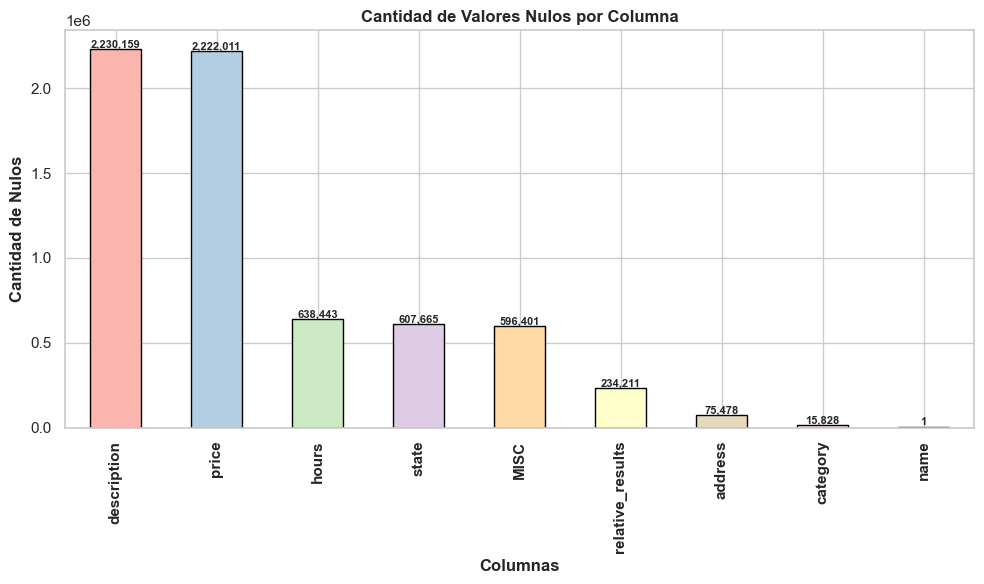

In [38]:
# Calcular la cantidad de nulos por columna
null_counts = data_sitios.isnull().sum()

# Filtrar las columnas que tienen nulos
columns_with_nans = null_counts[null_counts > 0]

# Ordenar las columnas de mayor a menor cantidad de nulos
sorted_null_counts = columns_with_nans.sort_values(ascending=False)

# Crear la figura y el gráfico de barras
plt.figure(figsize=(10, 6))
plot = sorted_null_counts.plot(kind='bar', color=plt.cm.Pastel1(np.arange(len(sorted_null_counts))), edgecolor='black')

# Agregar números formateados en las barras
for i, v in enumerate(sorted_null_counts):
    formatted_value = '{:,.0f}'.format(v)  # Formatear el número con separadores de miles
    plt.text(i, v + 50, formatted_value, ha='center', va='bottom', fontsize=8, fontweight='bold')

# Agregar etiquetas y título en negritas
plt.xlabel('Columnas', fontweight='bold')
plt.ylabel('Cantidad de Nulos', fontweight='bold')
plt.title('Cantidad de Valores Nulos por Columna', fontweight='bold')

# Cambiar el estilo de las etiquetas del eje x a negritas
plt.xticks(range(len(sorted_null_counts.index)), sorted_null_counts.index, rotation=90, fontweight='bold')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [39]:
columns_to_drop = ['price', 'hours', 'state', 'relative_results', 'description', 'url'] #, 'MISC'
data_sitios.drop(columns=columns_to_drop, inplace=True)

data_sitios

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,MISC
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,Pharmacy,4.9,16,"{'Service options': ['In-store shopping', 'Sam..."
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,34.018891,-118.215290,Textile exporter,4.5,6,None
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,Korean restaurant,4.4,18,"{'Service options': ['Takeout', 'Dine-in', 'De..."
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,34.023669,-118.232930,Fabric store,3.3,6,"{'Service options': ['In-store shopping'], 'Pa..."
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,34.036694,-118.249421,Fabric store,4.3,7,{'Service options': ['In-store pickup']}
...,...,...,...,...,...,...,...,...,...
3025006,Steak 48,"Steak 48, 260 S Broad St, Philadelphia, PA 19102",0x89c6c74f43a49b55:0x6be6995921c58b12,39.947254,-75.164953,"Steak house, Fine dining restaurant, Seafood r...",4.6,308,"{'Service options': ['Takeout', 'Dine-in', 'De..."
3025007,"Jack Mcnerney Chevrolet, Inc.","Jack Mcnerney Chevrolet, Inc., 363 NY-281, Tul...",0x89da1787d3fdc4a5:0xce92ea6e3cd4d1cc,42.788636,-76.122120,Chevrolet dealer,4.4,143,"{'Service options': ['In-store shopping'], 'Of..."
3025008,Central Ny Spay Neuter Assista,"Central Ny Spay Neuter Assista, 17 Salisbury S...",0x89da6b9ce832726f:0xbd0d3630f1e3b42e,42.603831,-76.165286,Veterinarian,4.3,88,{'Planning': ['Appointments recommended']}
3025009,Ok Feed Store,"Ok Feed Store, 16300 SW 296th St, Homestead, F...",0x88d9e872a9e39f3d:0x5de29f50507e5d73,25.491641,-80.456076,Animal feed store,4.9,13,"{'Service options': ['Curbside pickup', 'In-st..."


Tomamos la decisión de enfocarnos en la columna "category" como parte fundamental para nuestras decisiones. Dado que esta columna es crucial para determinar cómo trabajar con diferentes porciones de datos, optamos por eliminar los registros con valores nulos en esta columna. Esto nos permite mantener la integridad de los datos relevantes para nuestro análisis y tomar decisiones basadas en información valiosa.

In [40]:
data_sitios.dropna(subset=['category'], inplace=True)

data_sitios

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,MISC
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,Pharmacy,4.9,16,"{'Service options': ['In-store shopping', 'Sam..."
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,34.018891,-118.215290,Textile exporter,4.5,6,None
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,Korean restaurant,4.4,18,"{'Service options': ['Takeout', 'Dine-in', 'De..."
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,34.023669,-118.232930,Fabric store,3.3,6,"{'Service options': ['In-store shopping'], 'Pa..."
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,34.036694,-118.249421,Fabric store,4.3,7,{'Service options': ['In-store pickup']}
...,...,...,...,...,...,...,...,...,...
3025006,Steak 48,"Steak 48, 260 S Broad St, Philadelphia, PA 19102",0x89c6c74f43a49b55:0x6be6995921c58b12,39.947254,-75.164953,"Steak house, Fine dining restaurant, Seafood r...",4.6,308,"{'Service options': ['Takeout', 'Dine-in', 'De..."
3025007,"Jack Mcnerney Chevrolet, Inc.","Jack Mcnerney Chevrolet, Inc., 363 NY-281, Tul...",0x89da1787d3fdc4a5:0xce92ea6e3cd4d1cc,42.788636,-76.122120,Chevrolet dealer,4.4,143,"{'Service options': ['In-store shopping'], 'Of..."
3025008,Central Ny Spay Neuter Assista,"Central Ny Spay Neuter Assista, 17 Salisbury S...",0x89da6b9ce832726f:0xbd0d3630f1e3b42e,42.603831,-76.165286,Veterinarian,4.3,88,{'Planning': ['Appointments recommended']}
3025009,Ok Feed Store,"Ok Feed Store, 16300 SW 296th St, Homestead, F...",0x88d9e872a9e39f3d:0x5de29f50507e5d73,25.491641,-80.456076,Animal feed store,4.9,13,"{'Service options': ['Curbside pickup', 'In-st..."


Con el objetivo de asegurar la integridad y utilidad de nuestros datos, hemos procedido a eliminar los valores nulos restantes en las columnas 'address' y 'name'. Esta medida nos permitirá contar con una base de datos más limpia y coherente, preparada para su utilización sin inconvenientes. La eliminación de estos valores nulos contribuye a garantizar la calidad de la información que ponemos a disposición y a optimizar su aprovechamiento en nuestras futuras tareas y análisis.

In [41]:
data_sitios = data_sitios.dropna()

Se ha tomado la acción de guardar los datos limpios en un archivo con formato Parquet. Esta elección proporciona beneficios significativos para futuros análisis y procesamientos. El formato Parquet es altamente eficiente en términos de almacenamiento y compresión, lo que ayuda a reducir el espacio ocupado por los datos en el almacenamiento. Además, Parquet es compatible con la ejecución paralela y la compresión de datos columnares, lo que acelera las consultas y el procesamiento en sistemas distribuidos. Al elegir el formato Parquet, estamos preparando nuestros datos para un acceso más rápido y eficiente en futuras etapas de análisis, permitiendo un flujo de trabajo más eficiente y una mejor utilización de los recursos de cómputo.

In [42]:
data_folder = 'Dataset de Google Maps\\metadata.sitios'
parquet_filepath = os.path.join(data_folder, 'data_sitios.parquet')

data_sitios.to_parquet(parquet_filepath, index=False)

print(f"Datos guardados en {parquet_filepath}")

Datos guardados en Dataset de Google Maps\metadata.sitios\data_sitios.parquet


---
---

Luego de haber guardado los datos en el formato Parquet, procedemos a evaluar el tiempo requerido para cargar el archivo. Esta verificación nos permite tener una idea clara del rendimiento y la eficiencia del formato Parquet en términos de velocidad de carga. Al conocer el tiempo de procesamiento, podemos asegurarnos de que nuestras decisiones de almacenamiento estén respaldadas por resultados tangibles y tomar medidas para optimizar aún más nuestro flujo de trabajo si es necesario.

In [4]:
parquet_filepath = 'Dataset de Google Maps\\metadata.sitios\\data_sitios.parquet'

data_sitios = pd.read_parquet(parquet_filepath)

In [5]:
data_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692797 entries, 0 to 1692796
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   name            object 
 1   address         object 
 2   gmap_id         object 
 3   latitude        float64
 4   longitude       float64
 5   category        object 
 6   avg_rating      float64
 7   num_of_reviews  int64  
 8   MISC            object 
dtypes: float64(3), int64(1), object(5)
memory usage: 116.2+ MB


Hemos iniciado el proceso de validar la cantidad de categorías diferentes disponibles en nuestros datos. Esta validación es esencial para comprender la diversidad y amplitud de las categorías presentes en el conjunto de datos. Al conocer el número y la variedad de categorías, podremos tomar decisiones más informadas sobre cómo enfocar nuestro análisis y aprovechar al máximo la información proporcionada en cada categoría.

In [45]:
num_unique_categories = data_sitios['category'].nunique()
print("Número de categorías únicas:", num_unique_categories)

Número de categorías únicas: 264441


Utilizando un gráfico de barras, visualizamos el top 10 de las categorías con la mayor cantidad de registros. Este enfoque nos permite identificar rápidamente las categorías más predominantes en el conjunto de datos. Al segmentar y filtrar los datos en función de estas categorías principales, estamos preparando una base sólida para nuestras futuras exploraciones y análisis más detallados. Esta estrategia nos ayuda a concentrarnos en áreas específicas de interés y a obtener insights más precisos y significativos.

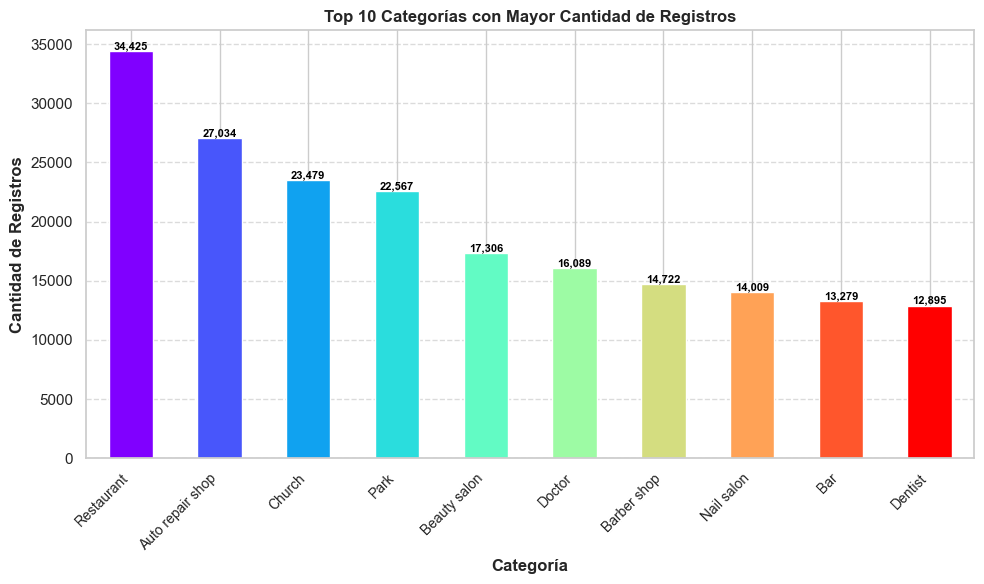

In [46]:
# Obtener el conteo de registros por categoría
category_counts = data_sitios['category'].value_counts()

# Tomar las primeras 10 categorías con mayor conteo
top_10_categories = category_counts.head(10)

# Crear una paleta de colores tipo arcoíris
num_colors = len(top_10_categories)
colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))

# Graficar las primeras 10 categorías con colores arcoíris
plt.figure(figsize=(10, 6))
bars = top_10_categories.plot(kind='bar', color=colors)  # Asignar los colores arcoíris

plt.title('Top 10 Categorías con Mayor Cantidad de Registros', fontweight='bold')
plt.xlabel('Categoría', fontweight='bold')
plt.ylabel('Cantidad de Registros', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Agregar cuadrícula
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Mostrar valores en las barras con separador de miles
for bar, color in zip(bars.patches, colors):
    yval = bar.get_height()
    formatted_value = '{:,.0f}'.format(yval)  # Formatear el número con separadores de miles
    plt.text(bar.get_x() + bar.get_width()/2, yval, formatted_value, ha='center', va='bottom', color='black', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()

Una vez hemos identificado que la categoría principal destacada es 'restaurant', el siguiente paso consiste en filtrar todas las categorías vinculadas a este tipo de establecimiento. Este proceso nos permitirá determinar si existen subcategorías específicas que podrían considerarse como parte integral de la categoría 'restaurant'. Mediante este análisis, buscamos una comprensión más profunda de las diversas subdivisiones que podrían enriquecer y ampliar la categoría principal.

In [6]:
# Lista de palabras clave
keywords = ["restaurant", "grill", "food"]

# Crear una máscara booleana para las filas que cumplan con las condiciones
mask = data_sitios['category'].str.contains('|'.join(keywords), case=False)

# Aplicar el filtro al DataFrame
data_sitios = data_sitios[mask]

data_sitios.reset_index(drop=True, inplace=True)

data_sitios

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,MISC
0,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,Korean restaurant,4.4,18,{'Accessibility': ['Wheelchair accessible entr...
1,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,33.916402,-118.010855,Restaurant,4.5,18,{'Accessibility': ['Wheelchair accessible entr...
2,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,41.616079,-93.865487,"Bakery, Health food restaurant",4.7,21,"{'Accessibility': None, 'Activities': None, 'A..."
3,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,39.940293,-75.150923,Restaurant,4.0,8,"{'Accessibility': None, 'Activities': None, 'A..."
4,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,21.637796,-157.920714,Restaurant,4.4,18,{'Accessibility': ['Wheelchair accessible entr...
...,...,...,...,...,...,...,...,...,...
156051,La Casa Mexican Restaurant,"La Casa Mexican Restaurant, 14 Bee Branch Rd, ...",0x87d268b0fbbfd4b9:0xeec251970fae404c,35.384414,-92.215903,Mexican restaurant,4.5,76,{'Accessibility': ['Wheelchair accessible entr...
156052,"Simple Simon's Pizza - Vilonia, AR","Simple Simon's Pizza - Vilonia, AR, 14 S Churc...",0x87d28d5aa640a9c5:0x3c9cc5d3a99de80c,35.081871,-92.207739,"Pizza Takeout, Italian restaurant, Pizza resta...",4.5,38,{'Accessibility': ['Wheelchair accessible entr...
156053,Subpreme Grill,"Subpreme Grill, 15260 SW 280th St UNIT 111, Ho...",0x88d9dd6e78851851:0x849dcf273582261c,25.506121,-80.438215,"Sandwich shop, Fast food restaurant, Takeout R...",4.3,393,{'Accessibility': ['Wheelchair accessible entr...
156054,Reuben's Marc,"Reuben's Marc, 8131 Stenton Ave, Philadelphia,...",0x89c6b993431d9a19:0xea378de3c317996e,40.067534,-75.179153,"Bar & grill, Bar",4.0,223,"{'Accessibility': None, 'Activities': None, 'A..."


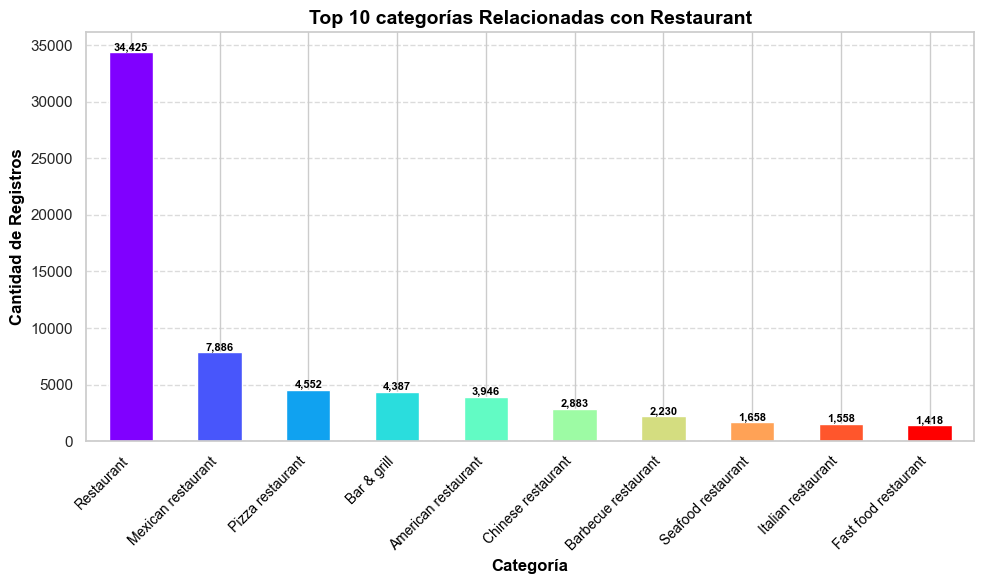

In [56]:
# Obtener el top 10 de categorías con la mayor cantidad de registros
top_categorias = data_sitios['category'].value_counts().head(10)

# Crear una paleta de colores tipo arcoíris
num_colors = len(top_categorias)
colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las primeras 10 categorías con colores arcoíris
bars = top_categorias.plot(kind='bar', color=colors, ax=ax)  # Asignar los colores arcoíris

# Agregar título y estilo
plt.title('Top 10 categorías Relacionadas con Restaurant', fontweight='bold', color='black', fontsize=14)
plt.xlabel('Categoría', fontweight='bold', color='black', fontsize=12)
plt.ylabel('Cantidad de Registros', fontweight='bold', color='black', fontsize=12)
plt.xticks(rotation=45, color='black', ha='right', fontsize=10)

# Agregar cuadrícula
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Mostrar valores en las barras con separador de miles y estilo
for bar, color in zip(bars.patches, colors):
    yval = bar.get_height()
    formatted_value = '{:,.0f}'.format(yval)  # Formatear el número con separadores de miles
    plt.text(bar.get_x() + bar.get_width()/2, yval, formatted_value, ha='center', va='bottom', color='black', fontweight='bold', fontsize=8)

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()

Aprovechando la columna "num_of_reviews", generamos una visualización que muestra las categorías con la mayor cantidad de reseñas (reviews). Esta representación gráfica nos permite comparar y contrastar con la visualización anterior y verificar si hay coincidencias en las categorías más destacadas en términos de registros y reseñas. Al analizar estas coincidencias, obtenemos una comprensión más profunda de las categorías que generan más atención y participación por parte de los usuarios, lo que puede influir en nuestras decisiones y enfoques futuros.

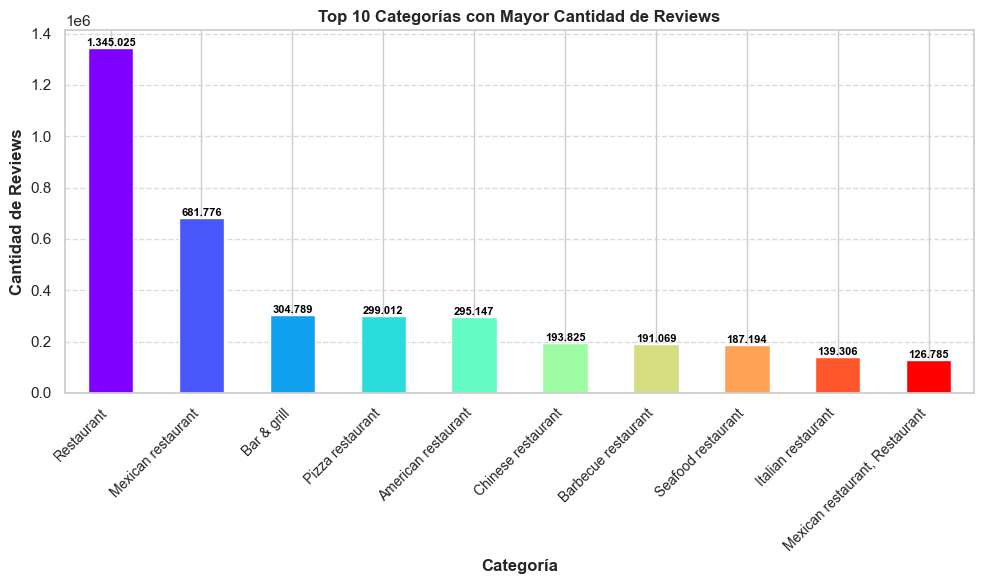

In [55]:
# Calcular la suma de "num_of_reviews" para cada categoría
sum_reviews_by_category = data_sitios.groupby('category')['num_of_reviews'].sum()

# Ordenar las categorías por la suma de revisiones de manera descendente
sum_reviews_by_category = sum_reviews_by_category.sort_values(ascending=False)

# Crear una figura de tamaño 10x6
plt.figure(figsize=(10, 6))

# Graficar las primeras 10 categorías con colores arcoíris
bars = sum_reviews_by_category.head(10).plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, 10)))

# Configurar título y etiquetas
plt.title('Top 10 Categorías con Mayor Cantidad de Reviews', fontweight='bold')
plt.xlabel('Categoría', fontweight='bold')
plt.ylabel('Cantidad de Reviews', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Agregar cuadrícula
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Mostrar valores en las barras
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:,.0f}'.format(yval).replace(',', '.'), ha='center', va='bottom', color='black', fontweight='bold', fontsize=8)

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()



Realizamos una exploración mediante un gráfico de bigotes en la columna 'avg_rating' con el objetivo de identificar posibles valores atípicos. Esta visualización nos ayuda a comprender mejor la distribución de los datos y detectar valores que se apartan significativamente de la norma. Al identificar estos valores atípicos, podemos tomar decisiones informadas sobre si es necesario aplicar algún tipo de tratamiento a la columna 'avg_rating', lo que contribuiría a la integridad y la calidad de nuestros análisis subsiguientes.

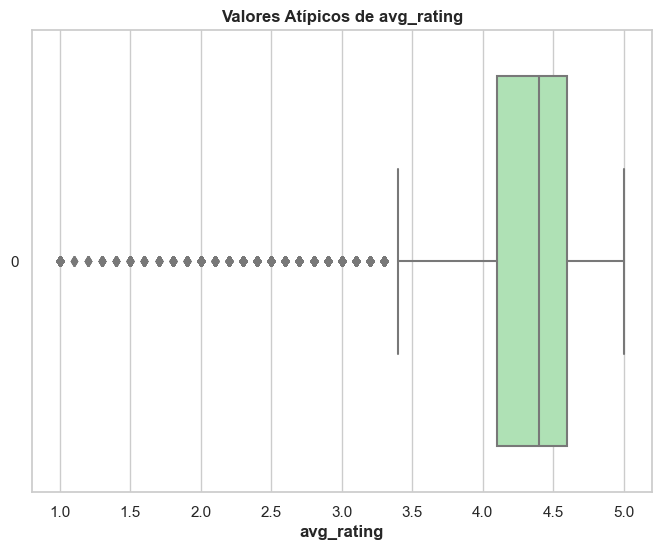

In [17]:
# Definir una paleta de colores personalizada (verde claro)
custom_palette = ["#A7E9AF"]  

# Configurar el estilo de los gráficos de Seaborn
sns.set(style="whitegrid", palette=custom_palette)

# Crear un gráfico de bigotes con personalizaciones
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=data_sitios['avg_rating'], orient='h')

# Personalizar el título y etiquetas con negritas
plt.title("Valores Atípicos de avg_rating", fontweight='bold')
plt.xlabel("avg_rating", fontweight='bold')

# Mostrar el gráfico
plt.show()

Exploramos en detalle la distribución de calificaciones, enfocándonos en el rango de 1 a 5. Esta concentración es esencial para entender la opinión predominante de los usuarios. La visualización revela patrones en la cantidad de reseñas para cada nivel de calificación.

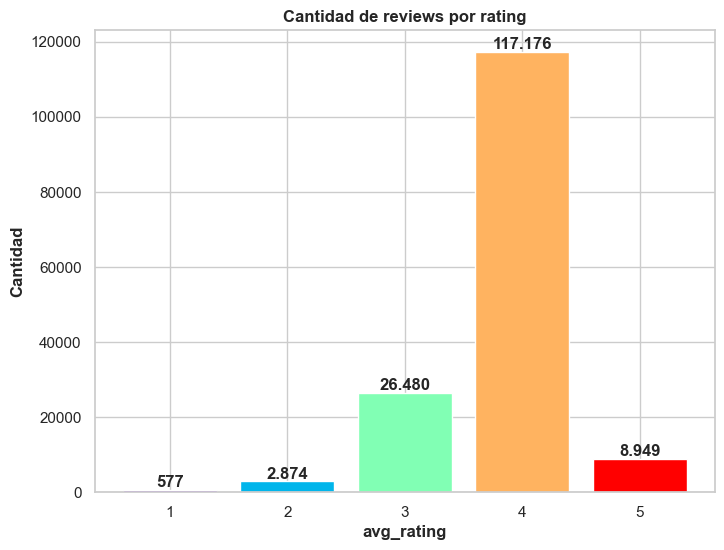

In [54]:
# Filtrar los valores enteros en el rango de 1 a 5
filtered_data = data_sitios[data_sitios['avg_rating'].between(1, 5, inclusive='both')]
filtered_data['avg_rating'] = filtered_data['avg_rating'].astype(int)  # Convertir a enteros

# Contar la frecuencia de cada valor entero en la columna "avg_rating"
rating_counts = filtered_data['avg_rating'].value_counts().sort_index()

# Crear una paleta de colores del arcoíris
num_colors = len(rating_counts)
rainbow_palette = plt.cm.rainbow(np.linspace(0, 1, num_colors))

# Crear un gráfico de barras con colores personalizados
plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=rainbow_palette)

# Agregar título y etiquetas a los ejes en negrita
plt.title("Cantidad de reviews por rating", fontweight='bold')
plt.xlabel("avg_rating", fontweight='bold')
plt.ylabel("Cantidad", fontweight='bold')

# Personalizar las etiquetas del eje x para mostrar solo números enteros
plt.xticks(rating_counts.index, rating_counts.index)

# Agregar el valor en cada barra
for bar, value in zip(bars, rating_counts.values):
    formatted_value = '{:,.0f}'.format(value).replace(',', '.')
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), formatted_value,
             va='bottom', ha='center', fontweight='bold')

# Mostrar el gráfico
plt.show()

Una vez identificada nuestra industria objetivo, estamos en el proceso de validar nuestros datos. Hemos seleccionado 10 registros para analizar la columna 'MISC', que contiene información sobre características y aspectos clave de las ubicaciones. Esta validación inicial nos dará una idea de la información que contiene la columna, preparándonos para tomar decisiones futuras en el proyecto. Estamos explorando cómo esta información puede ser útil en las etapas posteriores.

In [52]:
# Convertir el contenido de la columna 'MISC' a diccionarios
data_sitios['MISC'] = data_sitios['MISC'].apply(lambda x: json.loads(x.replace("'", "\"")) if isinstance(x, str) else x)

# Explorar la columna 'MISC' para los primeros 10 registros
for index, row in data_sitios.head(10).iterrows():
    misc_info = row['MISC']
    if misc_info is not None:
        print(f"Fila {index}:")
        for key, value in misc_info.items():
            print(f"  {key}: {value}")
        print("=" * 30)

Fila 0:
  Accessibility: ['Wheelchair accessible entrance']
  Activities: None
  Amenities: ['Good for kids']
  Atmosphere: ['Casual']
  Crowd: None
  Dining options: None
  From the business: None
  Getting here: None
  Health & safety: None
  Health and safety: None
  Highlights: None
  Lodging options: None
  Offerings: ['Comfort food']
  Payments: None
  Planning: None
  Popular for: None
  Recycling: None
  Service options: ['Takeout' 'Dine-in' 'Delivery']
Fila 1:
  Accessibility: ['Wheelchair accessible entrance']
  Activities: None
  Amenities: ['Good for kids']
  Atmosphere: ['Casual']
  Crowd: ['College students']
  Dining options: ['Lunch' 'Dinner']
  From the business: None
  Getting here: None
  Health & safety: ['Mask required' 'Staff wear masks'
 'Staff required to disinfect surfaces between visits']
  Health and safety: None
  Highlights: None
  Lodging options: None
  Offerings: ['Comfort food' 'Quick bite' 'Small plates']
  Payments: None
  Planning: None
  Popular for

Se realiza una exploración de la columna "address" para determinar si es posible extraer la ciudad y el estado.

In [29]:
miami_addresses = data_sitios[data_sitios['address'].str.contains('Miami', case=False)]['address'].head(10)
print("Primeras 10 direcciones que contienen 'Miami':")
for address in miami_addresses:
    print(address)

Primeras 10 direcciones que contienen 'Miami':
Choices Cafe, 711 NW 27th Ave, Miami, FL 33125
Biscayne Backyard Barbecue, 11064 Biscayne Blvd, Miami, FL 33161
Crab Du Jour Cajun Seafood & Bar, 3201 N Miami Ave Unit 106, Miami, FL 33127
Pizza cubana& Italiana Dileo's House LLC, 7300 W Flagler St, Miami, FL 33144
Palma Juice Co., 8300 NE 2nd Ave, Miami, FL 33138
Papa Nose Italian Eatery, 10851 SW 40th St, Miami, FL 33165
Pasha's, 1120 NW 14th St, Miami, FL 33136
Signatures7, 2250 NW 2nd Ave, Miami, FL 33127
Store Grocery, 727 NW 111th St, Miami, FL 33168
Nini Seafood, 3851 NW 125th St, Miami Gardens, FL 33054


Tras obtener un archivo CSV de la pagina "https://www.efrainmaps.es/descargas-gratuitas/estados-unidos/" que almacena una lista exhaustiva de ciudades y estados en Estados Unidos, se inicia el proceso de importación de dicho archivo. Esta importación permite enriquecer el DataFrame con valiosa información geográfica. Se crean columnas específicas destinadas a alojar esta información, allanando así el camino para análisis y exploraciones futuras. Al incorporar los datos de ciudades y estados al DataFrame, se establece una sólida base para realizar investigaciones y tomar decisiones informadas en análisis posteriores.

In [32]:
file_path = "Dataset de Google Maps/metadata.sitios/city_state_usa.csv"

df_city_state = pd.read_csv(file_path)

df_city_state.head()

,NOMBRE,ESTADO,STATE_NAME
0,Abbeville,AL,Alabama
1,Adamsville,AL,Alabama
2,Addison,AL,Alabama
3,Akron,AL,Alabama
4,Alabaster,AL,Alabama


En un proceso de análisis de datos, se lleva a cabo una intersección entre dos DataFrames: 'df_city_state' y 'data_sitios', con el propósito de identificar las correspondencias en los estados. Este paso es crucial para enriquecer los datos con información geográfica relevante. Mediante la identificación de coincidencias en los nombres y abreviaturas de estados presentes en las columnas de ambos DataFrames, se crea una nueva columna denominada 'state'. En esta columna, se almacenan los nombres de los estados que han sido encontrados, permitiendo así una organización efectiva y la posibilidad de llevar a cabo análisis más profundos basados en la ubicación geográfica.

In [54]:
# Función para extraer el estado de la dirección
def extract_state(address):
    for state_abbr, state_name in zip(df_city_state['ESTADO'], df_city_state['STATE_NAME']):
        if state_abbr in address or state_name in address:
            return state_name
    return None

# Crear la columna 'state' en data_sitios
data_sitios['state'] = data_sitios['address'].apply(extract_state)

# Imprimir las direcciones completas y la columna 'state' para los registros nulos o vacíos
null_state_records = data_sitios[data_sitios['state'].isnull()]
for index, row in null_state_records.iterrows():
    print("Dirección:", row['address'])
    print("Estado:", row['state'])
    print("----")

Dirección: Halal Food Cart, 92-55, 92-1 Sutphin Blvd, 11435
Estado: None
----
Dirección: The Jerk Shack, Cuba
Estado: None
----
Dirección: Bayview Restaurant, Deer Point Rd
Estado: None
----
Dirección: THE JUICER SHACK LLC, 1086 southern Blvd STB #2, 10459
Estado: None
----
Dirección: Cutterz Fish & Chipz, 1610 Nostrand Avenue Entrance On, Tilden Ave, 11226
Estado: None
----
Dirección: La Casa De Roberta’s, 349 Ave Dona Felisa Rincon de San Juan PR, 00926
Estado: None
----
Dirección: El Sazon Del Mujeron, 760 Grand Concorse Part #4, 10451
Estado: None
----
Dirección: Pat's Taqueria, Black Pot Beach, Hanalei Pier
Estado: None
----
Dirección: Clipper House Gallery, Midway Atoll
Estado: None
----


Tras el proceso de identificación de valores nulos y la exhaustiva revisión, se llega a la conclusión de que ciertos registros carecen de información que permita su vinculación con el DataFrame 'df_city_state'. Al no contar con datos que puedan ser cruzados y asignados a un estado específico, se considera que no es viable rescatar esta información. En consecuencia, se toma la decisión de eliminar estos registros nulos. Es importante destacar que esta acción tiene un impacto mínimo en la totalidad de los datos, garantizando la integridad de la información restante y su coherencia en futuros análisis.

In [55]:
# Contar la cantidad de valores nulos en la columna 'state'
null_state_count = data_sitios['state'].isnull().sum()

# Imprimir la cantidad de valores nulos en la columna 'state'
print("Cantidad de valores nulos en la columna 'state':", null_state_count)

Cantidad de valores nulos en la columna 'state': 9


In [58]:
# Eliminar los registros nulos en la columna 'state'
data_sitios.dropna(subset=['state'], inplace=True)

# Mostrar la cantidad de registros después de eliminar los nulos
print("Cantidad de registros después de eliminar los nulos:", len(data_sitios))

Cantidad de registros después de eliminar los nulos: 156047


Con el propósito de obtener una perspectiva visual clara acerca de los estados que albergan una mayor cantidad de restaurantes, se procede a crear un gráfico representativo. A través de esta representación gráfica, se logra apreciar de manera efectiva la distribución de establecimientos gastronómicos en diferentes estados. Este enfoque facilita la identificación de los estados con una mayor densidad de restaurantes, proporcionando una valiosa comprensión geográfica que puede contribuir a la toma de decisiones informadas en análisis posteriores.

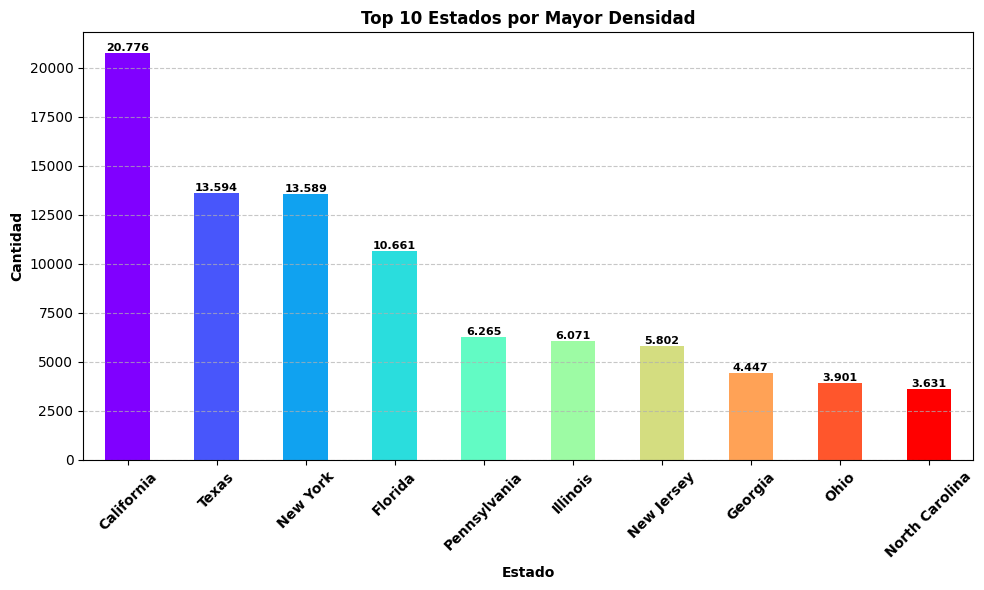

In [67]:
# Contar la frecuencia de cada estado
state_counts = data_sitios['state'].value_counts()

# Seleccionar el top 10 de estados más comunes
top_10_states = state_counts.head(10)

# Crear una figura de tamaño 10x6
plt.figure(figsize=(10, 6))

# Graficar las primeras 10 categorías con colores del arcoíris
bars = top_10_states.plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, 10)))

# Configurar título y etiquetas en negrita
plt.title('Top 10 Estados por Mayor Densidad', fontweight='bold')
plt.xlabel('Estado', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores en las barras
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:,.0f}'.format(yval).replace(',', '.'), ha='center', va='bottom', color='black', fontweight='bold', fontsize=8)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Se lleva a cabo una validación para identificar los restaurantes de proximidad a la ubicación del estadio del Inter de Miami. Utilizando datos de geolocalización, se calcula la distancia entre los puntos geográficos y se filtran aquellos restaurantes que se encuentran dentro de una distancia predeterminada del estadio. Este proceso permite determinar los restaurantes más cercanos al estadio, facilitando así la identificación de opciones de comida en las inmediaciones.

In [76]:
# Direccion Estadio DRV PNK
target_address = "1350 NW 55th St, Fort Lauderdale, FL 33309, Estados Unidos"

# Crear una instancia del geocodificador de Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

# Obtener las coordenadas geográficas (latitud y longitud) de la dirección del estadio
location = geolocator.geocode(target_address)
latitude_target = location.latitude
longitude_target = location.longitude

# Función para calcular la distancia entre dos puntos en coordenadas
def calculate_distance(row):
    coords = (row['latitude'], row['longitude'])
    return great_circle(coords, (latitude_target, longitude_target)).kilometers

# Calcular la distancia a la dirección objetivo y filtrar directamente
max_distance = 2
filtered_data_sitios = data_sitios[data_sitios.apply(calculate_distance, axis=1) <= max_distance]

# Imprimir las direcciones completas y otros detalles de las filas cercanas
for index, row in filtered_data_sitios.iterrows():
    print("Address:", row['address'])
    print("Distance:", round(calculate_distance(row), 2), "km")
    print("-----------------------")


Address: K'ondas Food Truck, 1481 SW 26th Ave, Pompano Beach, FL 33069
Distance: 1.94 km
-----------------------
Address: Crisp Eatery and Bar, 4900 Powerline Rd, Fort Lauderdale, FL 33309
Distance: 1.01 km
-----------------------
Address: Twin Peaks Cypress Creek, 6401 N Andrews Ave, Fort Lauderdale, FL 33309
Distance: 1.94 km
-----------------------
Address: Michael’s Restaurant, 6880 Powerline Rd, Fort Lauderdale, FL 33309
Distance: 1.87 km
-----------------------
Address: Terrace 555 Restaurant & Bar, 555 NW 62nd St, Fort Lauderdale, FL 33309
Distance: 1.5 km
-----------------------
Address: Antojitos To Go by Annies Bakery, 6303 Powerline Rd, Fort Lauderdale, FL 33309
Distance: 1.37 km
-----------------------
Address: FROOTS, Inside LA Fitness, 6501 N Andrews Ave, Fort Lauderdale, FL 33309
Distance: 1.96 km
-----------------------
Address: Cypress Cafe, 6127, 500 W Cypress Creek Rd # 160, Fort Lauderdale, FL 33309
Distance: 1.37 km
-----------------------
Address: Offerdahl's Off-

In [81]:
filtered_data_sitios

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,MISC,state
1626,K'ondas Food Truck,"K'ondas Food Truck, 1481 SW 26th Ave, Pompano ...",0x88d9030aeeb8f26d:0x42f0b0758d098e3f,26.211112,-80.156290,"Latin American restaurant, Mobile caterer",4.7,8,{'Accessibility': ['Wheelchair accessible entr...,Florida
5182,Crisp Eatery and Bar,"Crisp Eatery and Bar, 4900 Powerline Rd, Fort ...",0x88d903a5fd32b767:0x78f9d79d1c30a94d,26.187596,-80.154235,Restaurant,4.8,58,{'Accessibility': ['Wheelchair accessible entr...,Florida
12789,Twin Peaks Cypress Creek,"Twin Peaks Cypress Creek, 6401 N Andrews Ave, ...",0x88d903b477afe417:0x61ddee1a384c12a0,26.206371,-80.147130,"Sports bar, Bar & grill, Hamburger restaurant",4.1,88,{'Accessibility': ['Wheelchair accessible entr...,Florida
21896,Michael’s Restaurant,"Michael’s Restaurant, 6880 Powerline Rd, Fort ...",0x88d903bab7a1f295:0x28e8464c2e8f0b95,26.210225,-80.155263,"Restaurant, Breakfast restaurant, Lunch restau...",4.0,33,"{'Accessibility': None, 'Activities': None, 'A...",Florida
31529,Terrace 555 Restaurant & Bar,"Terrace 555 Restaurant & Bar, 555 NW 62nd St, ...",0x88d903b6d0c8948b:0xfc00331cb4ccaf04,26.204086,-80.150844,Traditional American restaurant,4.0,28,"{'Accessibility': None, 'Activities': None, 'A...",Florida
48466,Antojitos To Go by Annies Bakery,"Antojitos To Go by Annies Bakery, 6303 Powerli...",0x88d903ba301918e5:0xfa3a24a20479f1d6,26.205847,-80.156545,"Peruvian restaurant, Latin American restaurant",4.6,116,{'Accessibility': ['Wheelchair accessible entr...,Florida
56505,FROOTS,"FROOTS, Inside LA Fitness, 6501 N Andrews Ave,...",0x88d903b3b071c84f:0xef527f675f8851cb,26.207551,-80.148206,"Health food restaurant, Juice shop",4.1,14,{'Accessibility': ['Wheelchair accessible entr...,Florida
68802,Cypress Cafe,"Cypress Cafe, 6127, 500 W Cypress Creek Rd # 1...",0x88d903b706e951e7:0x408564a20ca625c0,26.202666,-80.151090,"Restaurant, Deli",4.8,16,"{'Accessibility': None, 'Activities': None, 'A...",Florida
69887,Offerdahl's Off-The-Grill,"Offerdahl's Off-The-Grill, 2122 W Cypress Cree...",0x88d903fcb3557e35:0x14fe9e517020e8eb,26.201946,-80.172012,"Restaurant, American restaurant",4.9,8,{'Accessibility': ['Wheelchair accessible entr...,Florida
84307,Wings Plus Fort Lauderdale,"Wings Plus Fort Lauderdale, 87 Prospect Rd, Oa...",0x88d903d3f68c0a25:0x21a773ee87d89136,26.181720,-80.147546,"Chicken wings restaurant, Chicken restaurant, ...",4.4,1584,{'Accessibility': ['Wheelchair accessible entr...,Florida


Con respecto a la dirección que se ha seleccionado para el proyecto, es posible que nuestro público objetivo esté centrado en las ciudades de Miami y Fort Lauderdale, dada su proximidad al estadio. En consecuencia, hemos emprendido un análisis preliminar mediante un filtro específico para evaluar la cantidad de restaurantes presentes en estas dos ubicaciones. Esta aproximación nos permitirá entender la oferta gastronómica en estas ciudades clave y, al mismo tiempo, establecer una base sólida para futuras estrategias y decisiones relacionadas con el proyecto.

In [79]:
# Realizar un filtro preliminar para las ciudades de Miami y Fort Lauderdale
cities_filter = data_sitios[data_sitios['address'].str.contains('Miami|Fort Lauderdale', case=False, na=False)]

# Contar la cantidad de registros en las ciudades seleccionadas
count_miami = cities_filter[cities_filter['address'].str.contains('Miami', case=False, na=False)].shape[0]
count_fort_lauderdale = cities_filter[cities_filter['address'].str.contains('Fort Lauderdale', case=False, na=False)].shape[0]
total_count = cities_filter.shape[0]

# Mostrar la cantidad de registros por ciudad y el total
print("Cantidad de registros en Miami:", count_miami)
print("Cantidad de registros en Fort Lauderdale:", count_fort_lauderdale)
print("Total de registros en las ciudades seleccionadas:", total_count)

Cantidad de registros en Miami: 1710
Cantidad de registros en Fort Lauderdale: 210
Total de registros en las ciudades seleccionadas: 1918


Finalmente, como último paso en esta etapa, se ejecuta la acción de guardar el archivo que contiene la información necesaria para la continuación del desarrollo del proyecto. Esta decisión asegura que los datos relevantes, obtenidos a través de los análisis y filtrados, se encuentren disponibles y listos para ser utilizados en futuras fases del proyecto. Al salvaguardar esta información, se establece una base sólida que permitirá un progreso eficiente y coherente a medida que avanzamos en la planificación y ejecución de nuestros objetivos

In [82]:
data_folder = 'Dataset de Google Maps\\metadata.sitios'
parquet_filepath = os.path.join(data_folder, 'data_filtrada.parquet')

data_sitios.to_parquet(parquet_filepath, index=False)

print(f"Datos guardados en {parquet_filepath}")

Datos guardados en Dataset de Google Maps\metadata.sitios\data_filtrada.parquet
